<a href="https://colab.research.google.com/github/bsenst/LoopOfHenle/blob/main/TimeCourseLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [3]:
df = pd.read_csv("ckd_grouped.csv")
df.head()

,p_id,EntryDate,8574.0,3086.0,5254.0,2688.0,4769.0,13808.0,1675.0,2419.0,...,12369.0,12365.0,18029.0,18027.0,12449.0,12460.0,12483.0,12478.0,12471.0,543.0
0,10304,2015-02-28,113.3,8.1,3.94,256.0,15.0,5.6,4.31,84.5,...,3.59,1.36,0.4,0.02,0.5,2.8,64.0,8.5,24.2,2.19
1,10304,2015-05-31,112.0,7.9,4.25,223.0,14.2,5.6,4.21,86.0,...,3.66,1.29,0.5,0.03,0.5,3.7,64.9,8.0,22.9,1.96
2,10304,2015-06-30,NaN,NaN,NaN,251.0,14.1,5.1,4.48,83.7,...,3.15,1.29,0.4,0.02,0.6,3.9,61.9,8.3,25.3,NaN
3,10304,2015-11-30,115.7,8.9,3.76,235.0,14.2,5.5,4.22,83.0,...,3.68,1.15,0.2,0.01,0.5,3.7,65.1,10.3,20.4,2.22
4,10304,2016-03-31,NaN,NaN,NaN,246.0,14.9,4.5,4.18,83.7,...,2.83,1.12,0.0,0.00,0.4,4.4,62.7,7.7,24.8,NaN


In [22]:
df.shape

(2005, 36)

In [26]:
p10304 = df[df.p_id==10304]

In [66]:
scaler.fit(p10304.iloc[:,2:3])
print(scaler.data_max_)
scaler.fit(np.array(x).reshape(-1, 1))

[227.8]


MinMaxScaler()

# lab values over time
scaling and presenting lab values for one patient over time
noisy data, missing data, big data

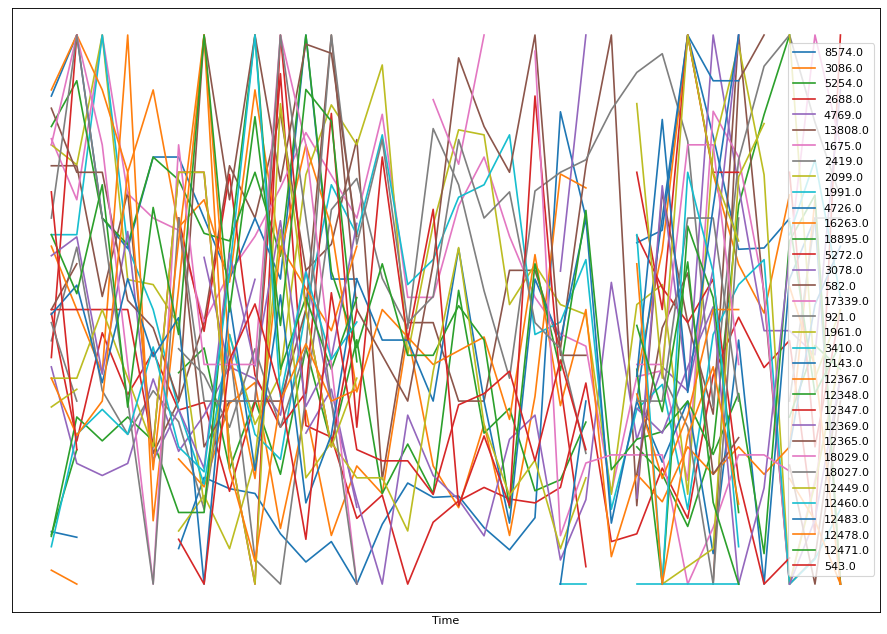

In [68]:
figure(figsize=(14, 10), dpi=80)
for feature in p10304.iloc[:,2:]:
  x = p10304[feature]
  scaler.fit(np.array(x).reshape(-1, 1))
  plt.plot(list(p10304.EntryDate), list(scaler.transform(np.array(x).reshape(-1, 1)).reshape(1, -1)[0]))
plt.legend(df.columns[2:])
plt.xticks([])
plt.yticks([])
plt.xlabel("Time")
plt.show()

# overview lab values several patients
find patterns in lab values over time prior to onset of CKD

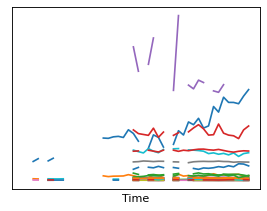

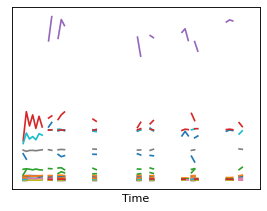

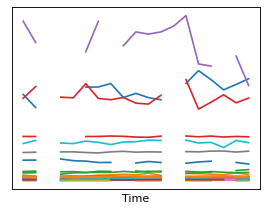

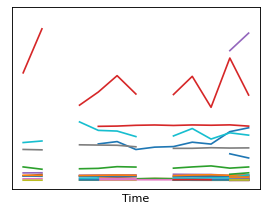

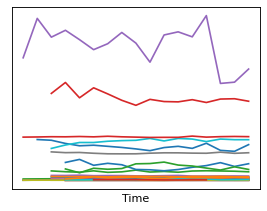

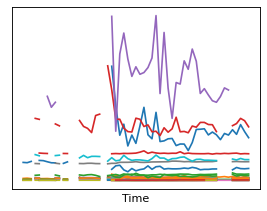

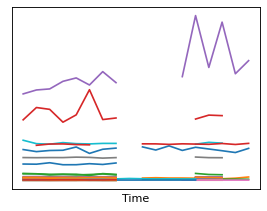

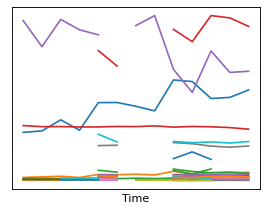

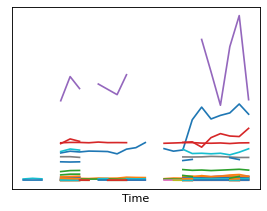

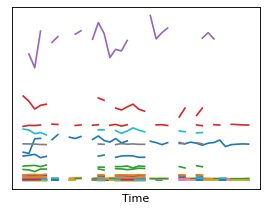

In [34]:
for p in list(df.p_id.unique())[10:20]:
  p_df = df[df.p_id==p]
  figure(figsize=(4, 3), dpi=80)
  plt.plot(list(p_df.EntryDate), p_df.iloc[:,2:])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel("Time")
  plt.show()

# time series analysis with python
sktime
flint
pyflux

In [69]:
! pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.0 MB 5.1 MB/s 


## Forecasting

In [83]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

y = load_airline()
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
mean_absolute_percentage_error(y_test, y_pred)

0.081746365738405

In [84]:
y

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

In [80]:
pd.Series(data=list(df["8574.0"]), index=list(df.EntryDate))

2015-02-28    113.3
2015-05-31    112.0
2015-06-30      NaN
2015-11-30    115.7
2016-03-31      NaN
              ...  
2021-11-30     83.4
2021-12-31     80.4
2022-06-30     86.4
2022-08-31     89.1
2022-11-30     81.4
Length: 2005, dtype: float64

In [81]:
y = pd.Series(data=list(df["8574.0"]), index=list(df.EntryDate))
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
mean_absolute_percentage_error(y_test, y_pred)

TypeError: ignored

## Time Series Classification

In [85]:
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_arrow_head()
X_train, X_test, y_train, y_test = train_test_split(X, y)
classifier = TimeSeriesForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8301886792452831

In [92]:
X

,dim_0
0,0 -1.963009 1 -1.957825 2 -1.95614...
1,0 -1.774571 1 -1.774036 2 -1.77658...
2,0 -1.866021 1 -1.841991 2 -1.83502...
3,0 -2.073758 1 -2.073301 2 -2.04460...
4,0 -1.746255 1 -1.741263 2 -1.72274...
...,...
206,0 -1.625142 1 -1.622988 2 -1.62606...
207,0 -1.657757 1 -1.664673 2 -1.63264...
208,0 -1.603279 1 -1.587365 2 -1.57740...
209,0 -1.739020 1 -1.741534 2 -1.73286...


In [91]:
df = pd.read_csv("train_data.csv")
df

,p_id,EntryDate,8574.0,3086.0,5254.0,2688.0,4769.0,13808.0,1675.0,2419.0,...,12365.0,18029.0,18027.0,12449.0,12460.0,12483.0,12478.0,12471.0,543.0,target
0,10304,2015-02-28,113.3,8.1,3.94,256.0,15.0,5.6,4.31,84.5,...,1.36,0.4,0.02,0.5,2.8,64.0,8.5,24.2,2.19,1
1,10304,2015-05-31,112.0,7.9,4.25,223.0,14.2,5.6,4.21,86.0,...,1.29,0.5,0.03,0.5,3.7,64.9,8.0,22.9,1.96,1
2,10304,2015-06-30,-999.0,-999.0,-999.00,251.0,14.1,5.1,4.48,83.7,...,1.29,0.4,0.02,0.6,3.9,61.9,8.3,25.3,-999.00,1
3,10304,2015-11-30,115.7,8.9,3.76,235.0,14.2,5.5,4.22,83.0,...,1.15,0.2,0.01,0.5,3.7,65.1,10.3,20.4,2.22,1
4,10304,2016-03-31,-999.0,-999.0,-999.00,246.0,14.9,4.5,4.18,83.7,...,1.12,0.0,0.00,0.4,4.4,62.7,7.7,24.8,-999.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174072,1472547,2020-08-31,63.7,4.6,-999.00,-999.0,-999.0,-999.0,-999.00,-999.0,...,-999.00,-999.0,-999.00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.00,0
174073,1472547,2021-03-31,62.0,3.2,-999.00,-999.0,-999.0,-999.0,-999.00,-999.0,...,-999.00,-999.0,-999.00,-999.0,-999.0,-999.0,-999.0,-999.0,1.12,0
174074,1472547,2022-03-31,61.5,4.2,4.66,254.0,14.3,8.2,4.43,82.4,...,-999.00,-999.0,-999.00,-999.0,-999.0,-999.0,-999.0,-999.0,1.18,0
174075,1472547,2022-06-30,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,-999.00,-999.0,...,-999.00,-999.0,-999.00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.00,0


## Time Series Clustering

In [93]:
from sklearn.model_selection import train_test_split
from sktime.clustering.k_means import TimeSeriesKMeans
from sktime.clustering.evaluation._plot_clustering import plot_cluster_algorithm
from sktime.datasets import load_arrow_head

X, y = load_arrow_head()
X_train, X_test, y_train, y_test = train_test_split(X, y)

k_means = TimeSeriesKMeans(n_clusters=5, init_algorithm="forgy", metric="dtw")
k_means.fit(X_train)
plot_cluster_algorithm(k_means, X_test, k_means.n_clusters)

ModuleNotFoundError: ignored

## Time series annotation

In [94]:
from sktime.annotation.adapters import PyODAnnotator
from pyod.models.iforest import IForest
from sktime.datasets import load_airline
y = load_airline()
pyod_model = IForest()
pyod_sktime_annotator = PyODAnnotator(pyod_model)
pyod_sktime_annotator.fit(y)
annotated_series = pyod_sktime_annotator.predict(y)

/usr/local/lib/python3.7/dist-packages/sktime/utils/validation/_dependencies.py:117: UserWarning: No module named 'pyod'. 'pyod' is a soft dependency and not included in the base sktime installation. Please run: `pip install pyod` to install the pyod package. To install all soft dependencies, run: `pip install sktime[all_extras]`
  warnings.warn(msg)


ModuleNotFoundError: ignored